<a href="https://colab.research.google.com/github/yurikaminski/AIDL19-DeepSales/blob/master/models/network_architecture_2_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1 We import the adequate libraries

In [0]:
import numpy as np
import keras
from scipy.io import wavfile
keras.__version__
np.random.seed(123)

### 2 We define our model architecture

In [0]:
from keras import models
from keras import layers
from keras import utils


model = models.Sequential()
model.add(layers.Conv1D(filters=64,kernel_size= 129, padding='same',input_shape=(24000,1)))
model.add(layers.MaxPooling1D(pool_size=8))
model.add(layers.Reshape((3000,64,1)))
model.add(layers.Conv2D(filters=96, kernel_size=(61,1),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(8,1)))
model.add(layers.Conv2D(filters=128, kernel_size= (35,1), padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(4,1)))
model.add(layers.Conv2D(filters=160, kernel_size= (17,1), padding = 'same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(12,1)))
model.add(layers.AveragePooling2D((5,1)))
model.add(layers.Flatten())
model.add(layers.MaxoutDense(output_dim=128,nb_feature=2))
model.add(layers.Dropout(0.5))
model.add(layers.MaxoutDense(output_dim=64, nb_feature=2))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1))




/usr/local/lib/python3.6/dist-packages/keras/legacy/layers.py:74: UserWarning: The `MaxoutDense` layer is deprecated and will be removed after 06/2017.
  warnings.warn('The `MaxoutDense` layer is deprecated '


### 3 We define the loss function and the optimization algorithm

In [0]:
model.compile(optimizer='SGD',
              loss='mean_squared_error',
              metrics=['accuracy'])

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 24000, 64)         8320      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 3000, 64)          0         
_________________________________________________________________
reshape_2 (Reshape)          (None, 3000, 64, 1)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3000, 64, 96)      5952      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 375, 64, 96)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 375, 64, 128)      430208    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 93, 64, 128)       0         
__________

### 4 We make a dumb trainnning in order to check the architecture

In [0]:
numSamples = 3
dummyTraining = np.random.random((numSamples,24000,1))
dummyLabel = numSamples*[0]

for i in range(numSamples):  
  dummyLabel[i]=(np.mean(dummyTraining[i]))
  print(dummyLabel[i])
   


0.4974949943662952
0.49931612767668015
0.5001137353587485


In [0]:
history = model.fit(dummyTraining,
                    dummyLabel,
                    epochs=100,
                    batch_size=3)
original_hist = history

Epoch 1/100
3/3 [==============================] - 1s 206ms/step - loss: 0.0111 - acc: 0.0000e+00
Epoch 2/100
3/3 [==============================] - 0s 50ms/step - loss: 0.0553 - acc: 0.0000e+00
Epoch 3/100
3/3 [==============================] - 0s 47ms/step - loss: 0.1519 - acc: 0.0000e+00
Epoch 4/100
3/3 [==============================] - 0s 44ms/step - loss: 0.0749 - acc: 0.0000e+00
Epoch 5/100
3/3 [==============================] - 0s 42ms/step - loss: 0.0116 - acc: 0.0000e+00
Epoch 6/100
3/3 [==============================] - 0s 40ms/step - loss: 0.0481 - acc: 0.0000e+00
Epoch 7/100
3/3 [==============================] - 0s 39ms/step - loss: 0.0207 - acc: 0.0000e+00
Epoch 8/100
3/3 [==============================] - 0s 39ms/step - loss: 0.0074 - acc: 0.0000e+00
Epoch 9/100
3/3 [==============================] - 0s 40ms/step - loss: 0.0037 - acc: 0.0000e+00
Epoch 10/100
3/3 [==============================] - 0s 39ms/step - loss: 0.0350 - acc: 0.0000e+00
Epoch 11/100
3/3 [==========

### 5 We plot the results

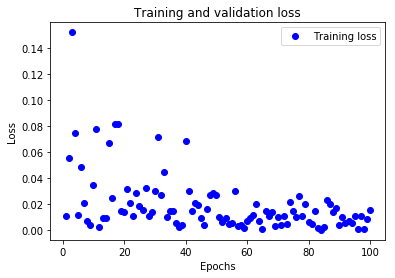

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

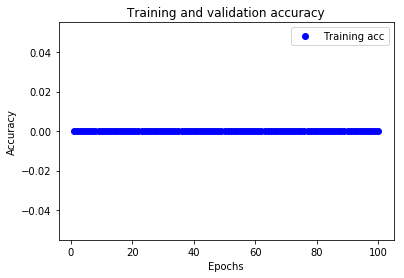

In [0]:
plt.clf()   # clear figure
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()